In [1]:
from os import walk
import cv2
from matplotlib.pyplot import imshow, show, subplots
import numpy as np
%matplotlib inline

def drawRectangle(image, points):
    for point in points:
        x, y = point
        x = int(x)
        y = int(y)
        cv2.rectangle(image,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    return image

In [2]:
def computeDefault(image, gray):
    corners = cv2.goodFeaturesToTrack(
        gray,
        maxCorners=20,
        qualityLevel=0.04,
        minDistance=1.0,
        useHarrisDetector=False,
    )
    for corner in corners:
        x, y = corner[0]
        x = int(x)
        y = int(y)
        cv2.rectangle(image,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    return image

In [3]:
def computeFast(image, gray):
    fast = cv2.FastFeatureDetector_create()
    fast.setThreshold(50)
    
    keypoints = fast.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image    

In [4]:
def computeOrb(image, gray):  
    orb = cv2.ORB_create()
    orb.setMaxFeatures(20)
    
    keypoints = orb.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image

In [5]:
def computeAgast(image, gray):
    agast = cv2.AgastFeatureDetector_create()
    agast.setThreshold(50)
    
    keypoints = agast.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image

In [6]:
def computeAkaze(image, gray):
    akaze = cv2.AKAZE_create()
    akaze.setThreshold(0.008)
    
    keypoints = akaze.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image

In [7]:
def computeBrisk(image, gray):
    brisk = cv2.BRISK_create(thresh=100)
    
    keypoints = brisk.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image

In [8]:
def computeSift(image, gray):
    sift = cv2.SIFT_create(nfeatures=20)
    
    keypoints = sift.detect(gray, None)
    points2f = cv2.KeyPoint_convert(keypoints)

    image = drawRectangle(image, points2f)
    return image

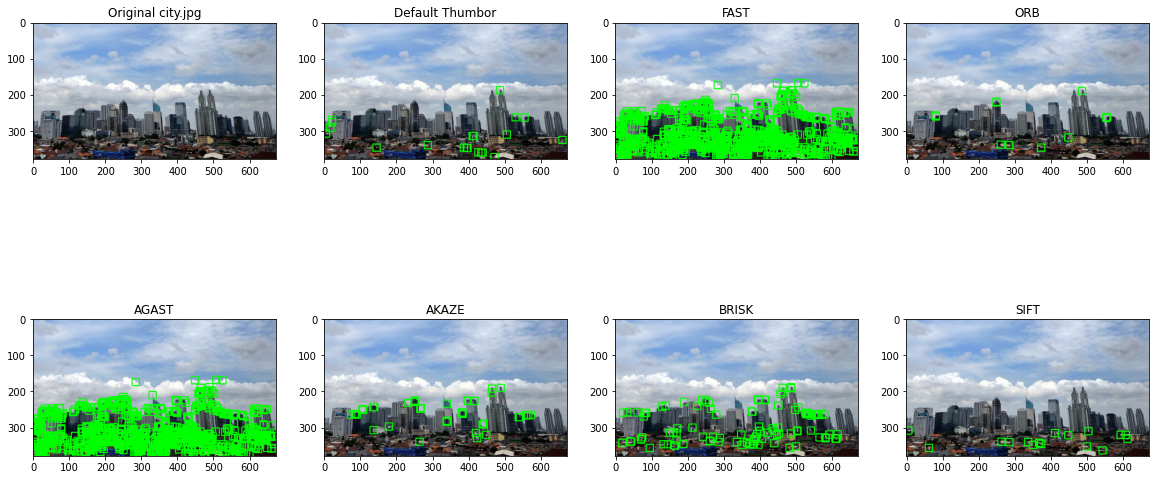

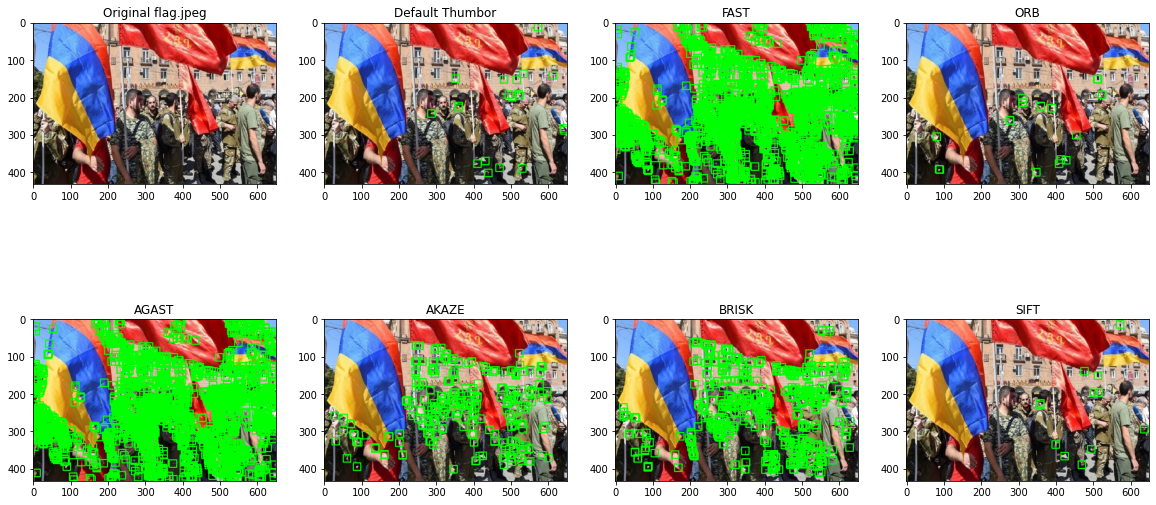

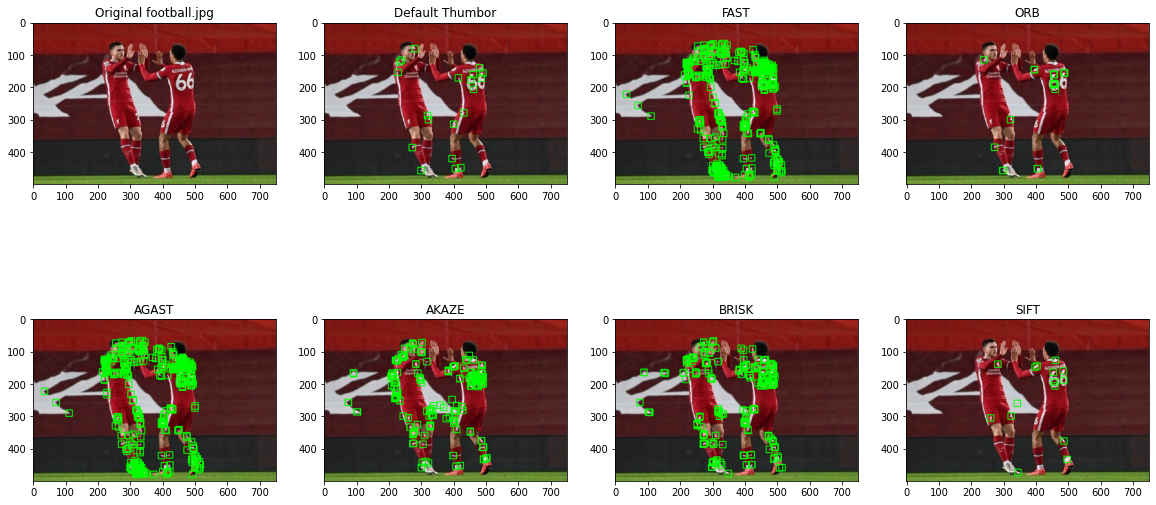

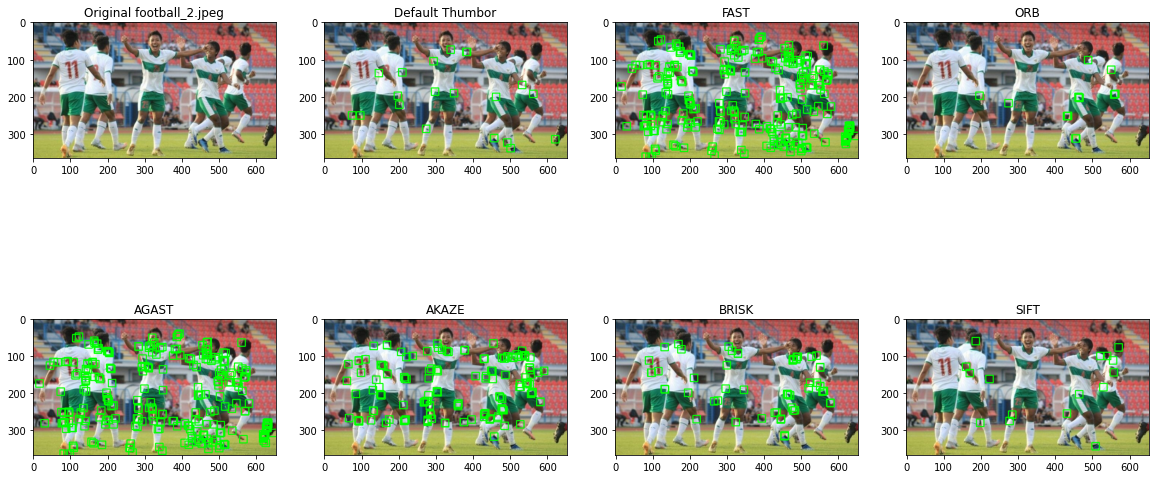

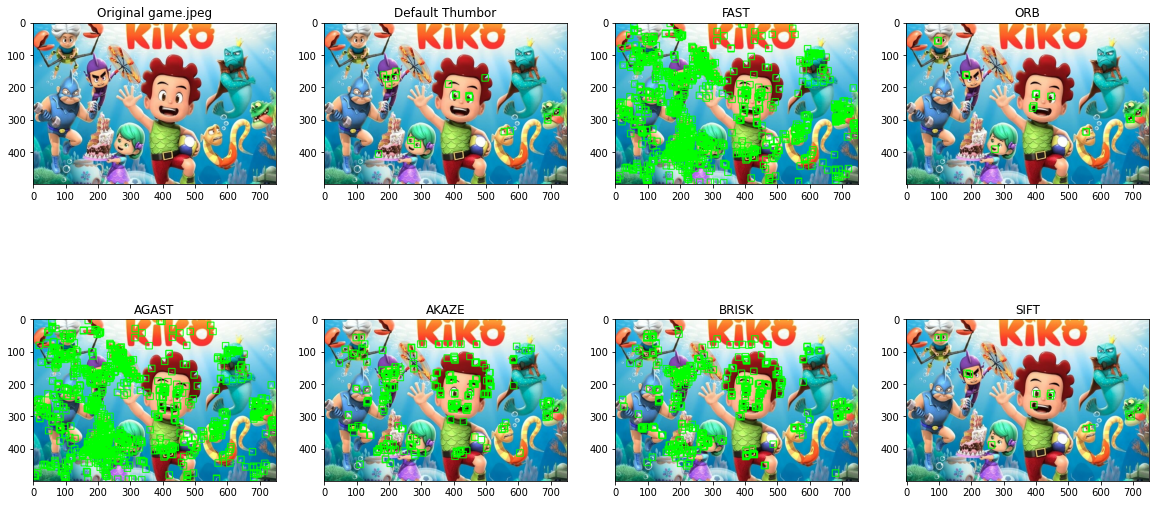

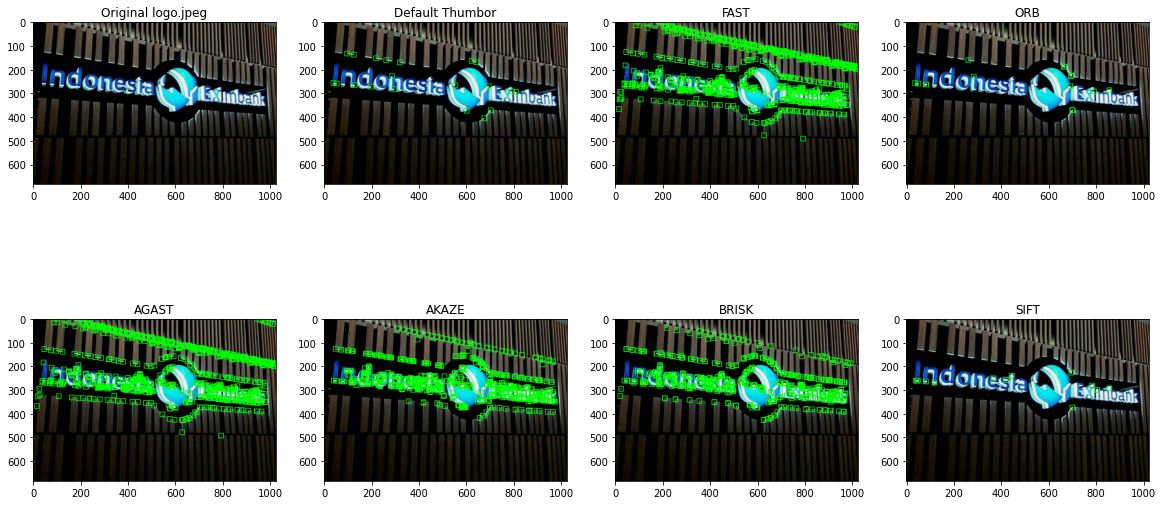

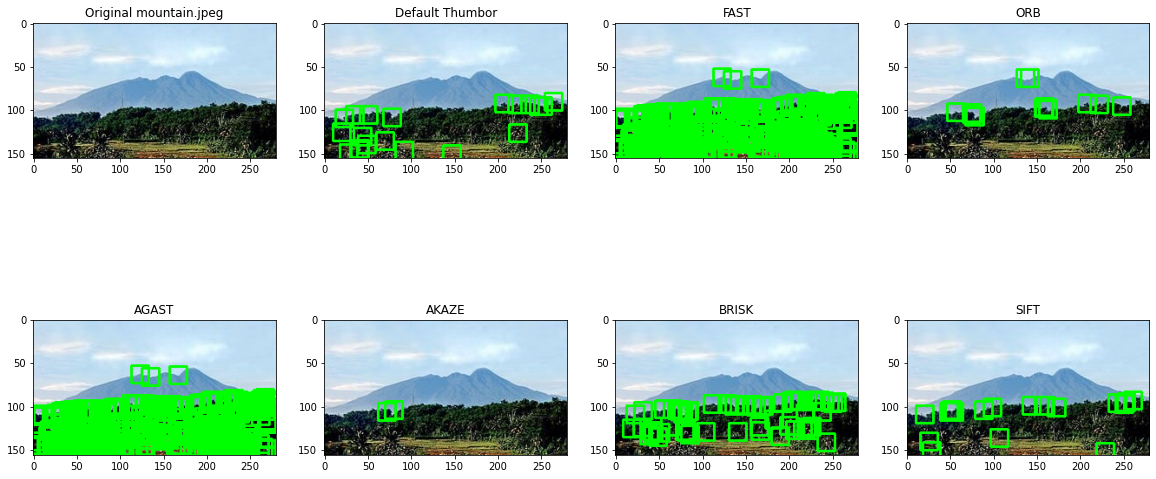

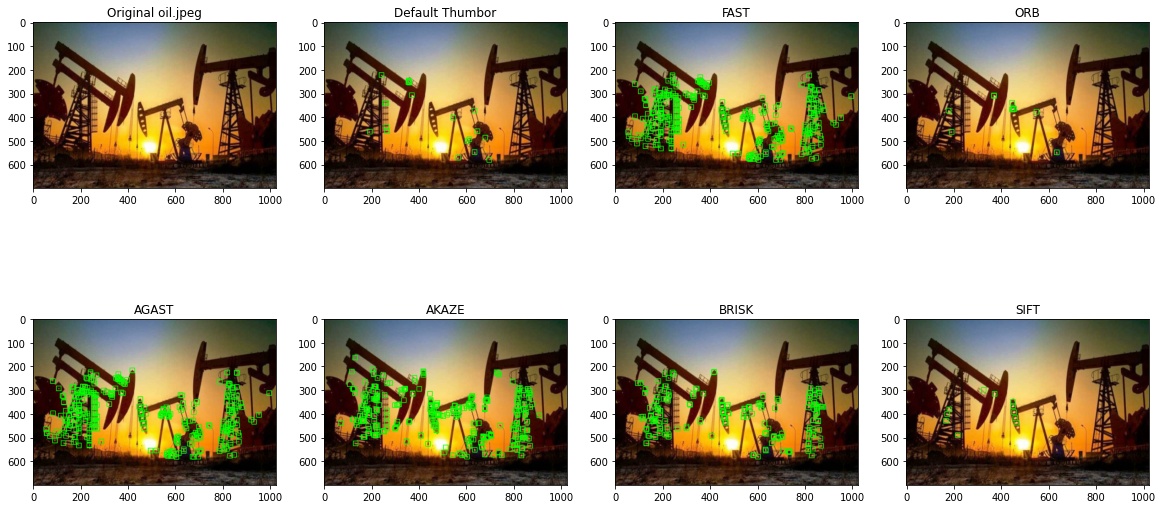

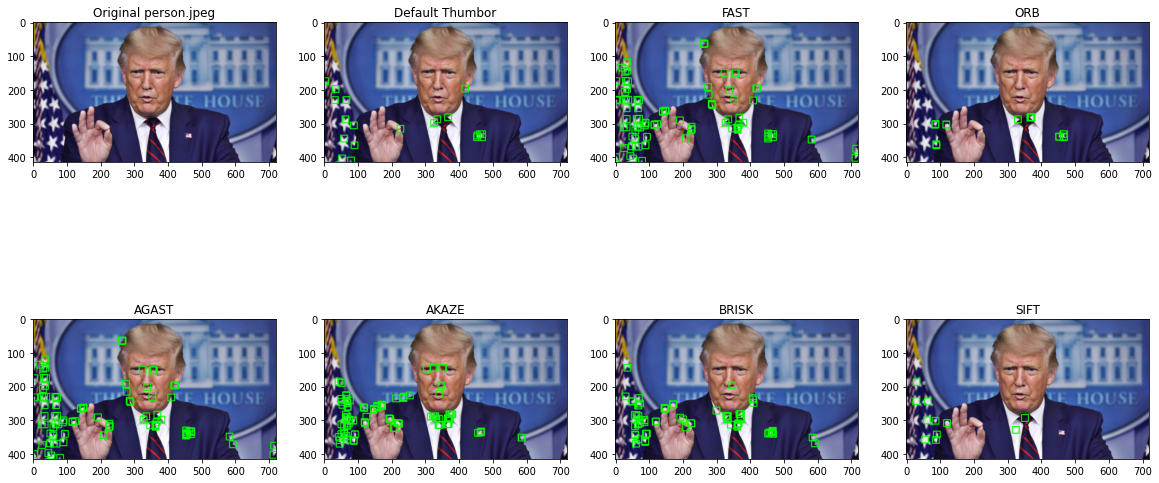

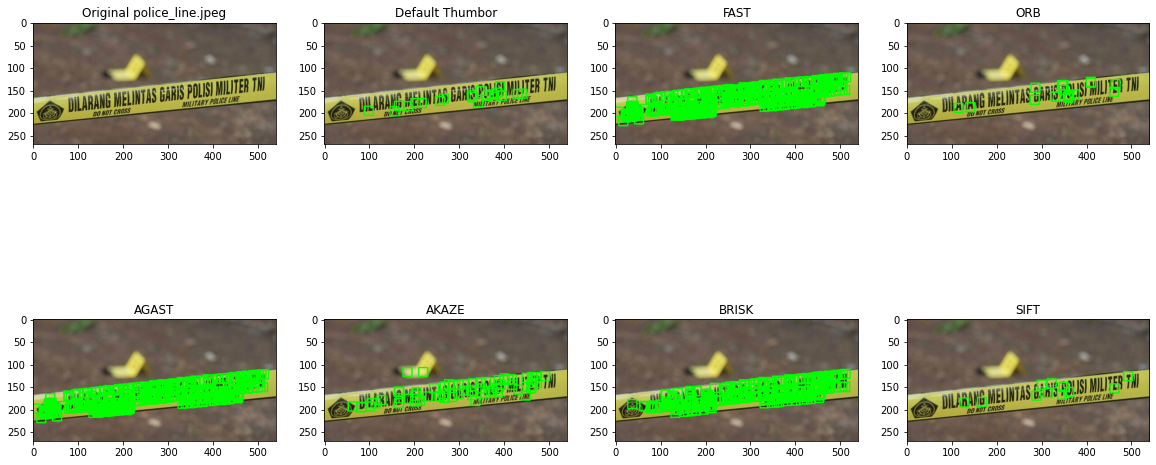

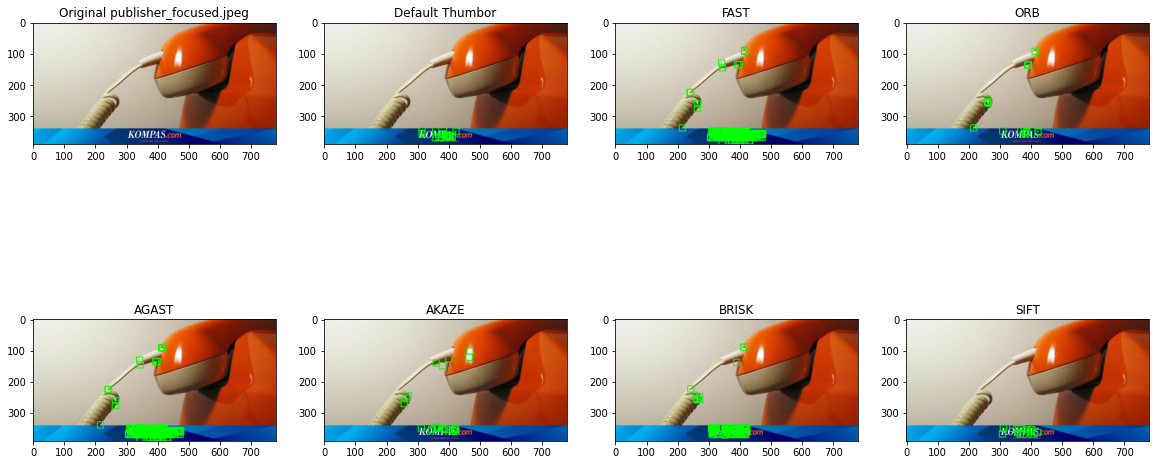

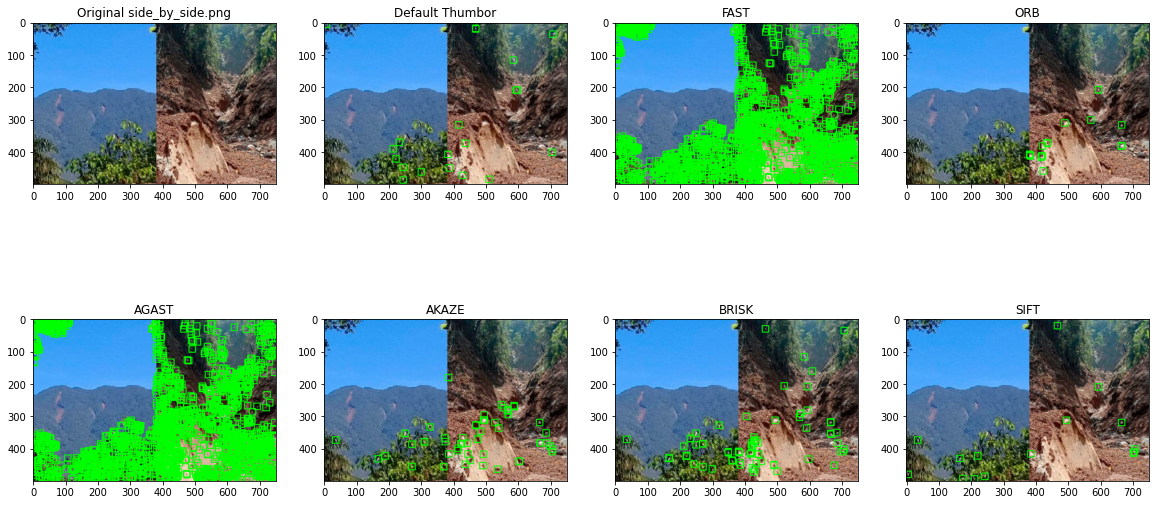

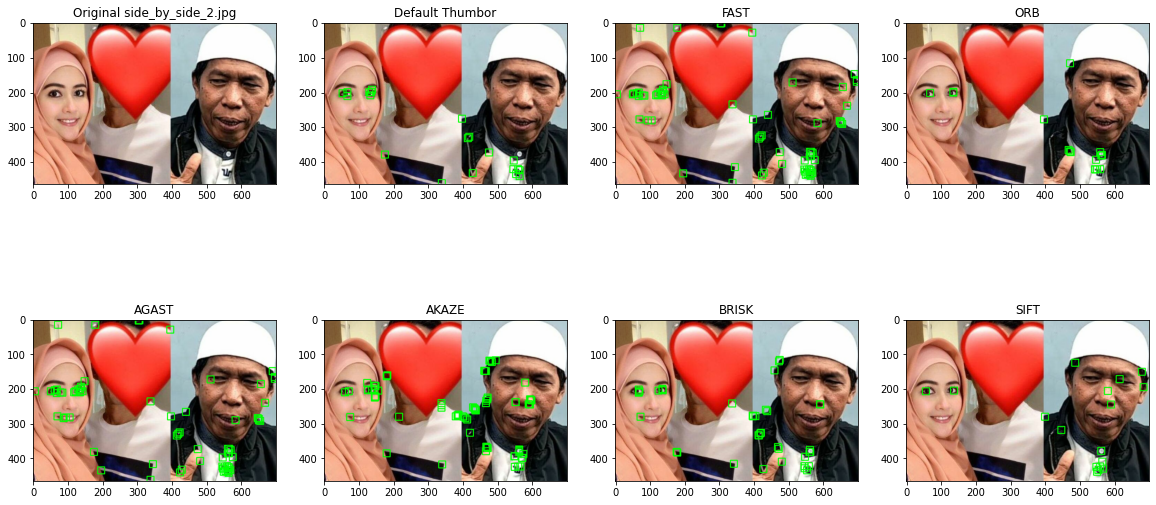

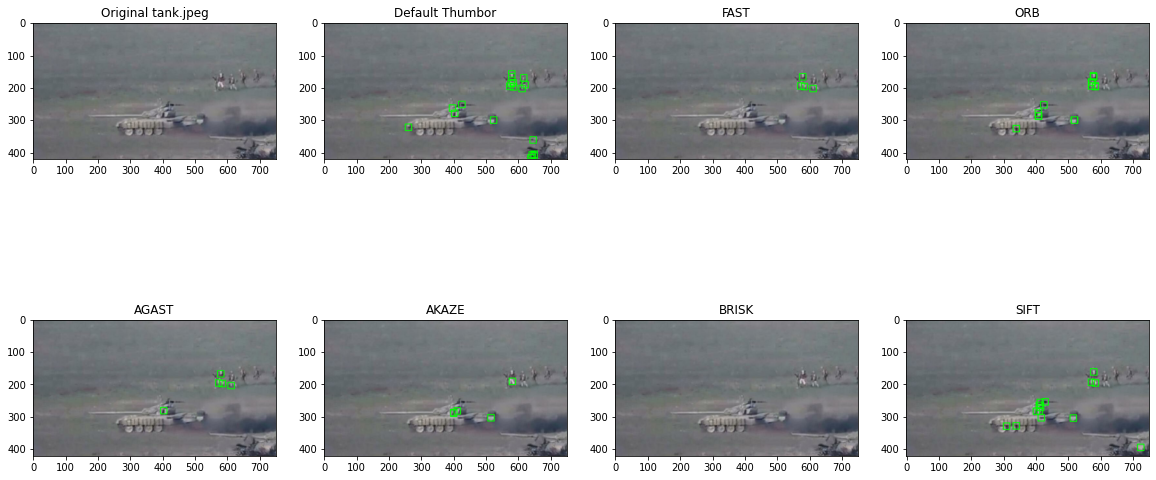

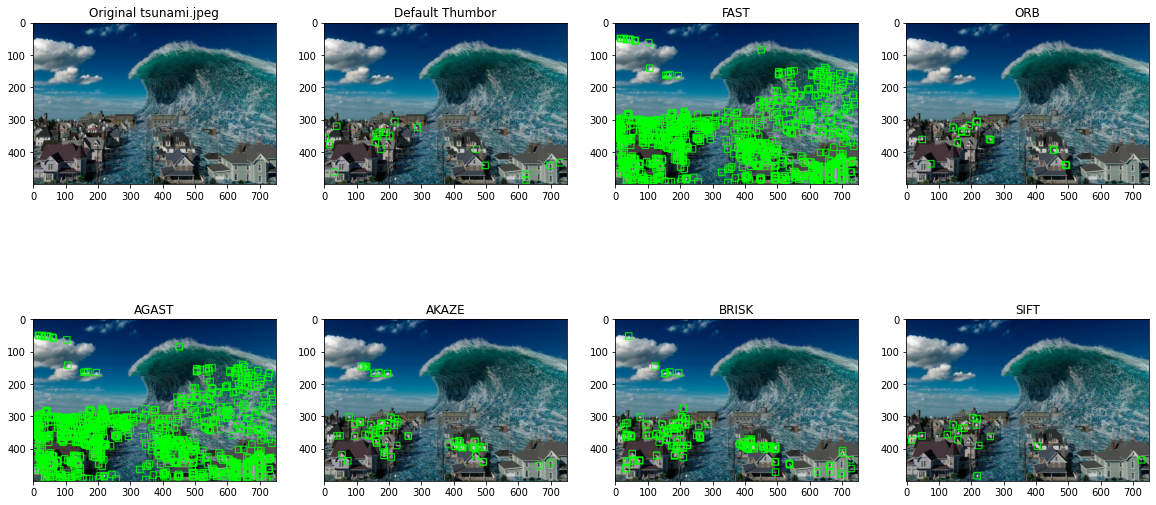

In [9]:
files = []
for (dirpath, dirnames, filenames) in walk("images"):
    files.extend(filenames)
    break
    

for file in files:
    # Load the image
    image1 = cv2.imread("./images/"+file)

    # Convert image to RGB
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    
    # Convert image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Display image and gray image
    fx, plots = subplots(2, 4, figsize=(20, 10))
    
    processed_default = computeDefault(np.copy(image), np.copy(gray))
    processed_fast = computeFast(np.copy(image), np.copy(gray))
    processed_orb = computeOrb(np.copy(image), np.copy(gray))
    processed_agast = computeAgast(np.copy(image), np.copy(gray))
    processed_akaze = computeAkaze(np.copy(image), np.copy(gray))
    processed_brisk = computeBrisk(np.copy(image), np.copy(gray))
    processed_sift = computeSift(np.copy(image), np.copy(gray))

    plots[0, 0].imshow(image)
    plots[0, 0].set_title("Original "+file)
    
    plots[0, 1].imshow(processed_default)
    plots[0, 1].set_title("Default Thumbor")
    
    plots[0, 2].imshow(processed_fast)
    plots[0, 2].set_title("FAST")
    
    plots[0, 3].imshow(processed_orb)
    plots[0, 3].set_title("ORB")
    
    plots[1, 0].imshow(processed_agast)
    plots[1, 0].set_title("AGAST")
    
    plots[1, 1].imshow(processed_akaze)
    plots[1, 1].set_title("AKAZE")
    
    plots[1, 2].imshow(processed_brisk)
    plots[1, 2].set_title("BRISK")
    
    plots[1, 3].imshow(processed_sift)
    plots[1, 3].set_title("SIFT")
    

In [10]:
#BENCHMARK

for file in files:
    image1 = cv2.imread(f"./images/{file}")

    # Convert image to RGB
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    # Convert image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    default = %timeit -qo processed_default = computeDefault(np.copy(image), np.copy(gray))
    print(f"default on {file}: {default}")
    fast = %timeit -qo processed_fast = computeFast(np.copy(image), np.copy(gray))
    print(f"fast on {file}: {fast}")
    orb = %timeit -qo processed_orb = computeOrb(np.copy(image), np.copy(gray))
    print(f"orb on {file}: {orb}")
    agast = %timeit -qo processed_agast = computeAgast(np.copy(image), np.copy(gray))
    print(f"agast on {file}: {agast}")
    akaze = %timeit -qo processed_akaze = computeAkaze(np.copy(image), np.copy(gray))
    print(f"akaze on {file}: {akaze}")
    brisk = %timeit -qo processed_brisk = computeBrisk(np.copy(image), np.copy(gray))
    print(f"brisk on {file}: {brisk}")
    sift = %timeit -qo processed_sift = computeSift(np.copy(image), np.copy(gray))
    print(f"sift on {file}: {sift}")
    print("\n\n")

default on city.jpg: 5.39 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
fast on city.jpg: 3.97 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
orb on city.jpg: 3.58 ms ± 84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
agast on city.jpg: 5.37 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
akaze on city.jpg: 25.1 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
brisk on city.jpg: 202 ms ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
sift on city.jpg: 34 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



default on flag.jpeg: 6.07 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
fast on flag.jpeg: 10.4 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
orb on flag.jpeg: 6.8 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
agast on flag.jpeg: 13 ms ± 770 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
akaze on fla